In [1565]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1566]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns',None)
# sns.set()

In [1567]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Mobile_data_Cleaned.csv")
df

,brand_name,model,price,rating,has_5g,has_nfc,has_ir,processor_name,processor_brand,processor_core,processor_speed,ram_capacity,storage,battery(mah),fast_charging,fast_charging_available,screen_size,resolution,refreah_rate,num_rear_camera,num_front_camera,Primary_camera,Front_camera,extended_memory_available,extended_upto,os
0,Oneplus,OnePlus 11 5G,54999,89.0,True,True,False,Snapdragon 8 Gen2,Qualcomm,8,3.20,12,256,5000,100.0,1,6.70,1440 x 3216,120,3,1,50,16.0,0,NaN,android
1,Oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,Snapdragon 695,Qualcomm,8,2.20,6,128,5000,33.0,1,6.59,1080 x 2412,120,3,1,64,16.0,1,1024.0,android
2,Samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,Exynos 1330,Samsung,8,2.40,4,64,5000,15.0,1,6.60,1080 x 2408,90,3,1,50,13.0,1,1024.0,android
3,Motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,Snapdragon 695,Qualcomm,8,2.20,6,128,5000,NaN,1,6.55,1080 x 2400,120,3,1,50,16.0,1,1024.0,android
4,Realme,Realme 10 Pro Plus,24999,82.0,True,False,False,Dimensity 1080,MediaTek,8,2.60,6,128,5000,67.0,1,6.70,1080 x 2412,120,3,1,108,16.0,0,NaN,android
5,Samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,Snapdragon 750G,Qualcomm,8,2.20,6,128,5000,25.0,1,6.60,1080 x 2408,120,3,1,50,8.0,1,1024.0,android
6,Apple,Apple iPhone 14,65999,81.0,True,True,False,Bionic A15,Apple,6,3.22,6,128,3279,NaN,1,6.10,1170 x 2532,60,2,1,12,12.0,0,NaN,ios
7,Xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,True,False,True,Dimensity 1080,MediaTek,8,2.60,8,256,4980,120.0,1,6.67,1080 x 2400,120,3,1,200,16.0,0,NaN,android
8,Nothing,Nothing Phone 1,26749,85.0,True,True,False,Snapdragon 778G Plus,Qualcomm,8,2.50,8,128,4500,33.0,1,6.55,1080 x 2400,120,2,1,50,16.0,0,NaN,android
9,Oneplus,OnePlus Nord 2T 5G,28999,84.0,True,True,False,Dimensity 1300,MediaTek,8,3.00,8,128,4500,80.0,1,6.43,1080 x 2400,90,3,1,50,32.0,0,NaN,android


In [1568]:
df.loc[427,"price"] = 65000

In [1569]:
df.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,101
has_5g,0
has_nfc,0
has_ir,0
processor_name,0
processor_brand,0
processor_core,0


# Univariate

In [1570]:
# Brand_name
df["brand_name"].value_counts()

,count
brand_name,
Xiaomi,134
Samsung,132
Vivo,111
Realme,97
Oppo,88
Motorola,52
Apple,46
Oneplus,42
Poco,41


In [1571]:
# plot a graph of top 5 garph
data = df["brand_name"].value_counts().head(10)
px.bar(data,x = data.index,y = data.values)

In [1572]:
data = df["brand_name"].value_counts().head(20)
px.pie(data,values = data.values,names = data.index)

In [1573]:
# Price
# The distribution is not normal. There is outliers
df.drop(index = [458,478,887,951],inplace = True) # delete the outliers
df["price"].describe()

,price
count,976.000000
mean,30891.511270
std,29395.688658
min,3499.000000
25%,12999.000000
50%,19990.000000
75%,34999.000000
max,182999.000000


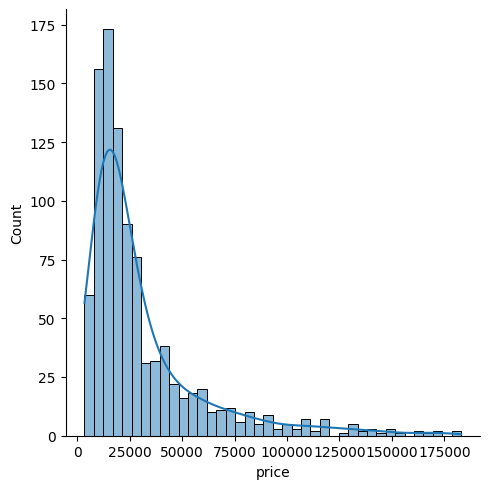

In [1574]:
sns.displot(df,x = "price",kind = "hist",kde = True,bins = 40)

In [1575]:
# Too high
df["price"].skew()

2.3177913082066492

In [1576]:
px.box(df,y = "price")

In [1577]:
# Outliers detected
df[df["price"] > 200000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir,processor_name,processor_brand,processor_core,processor_speed,ram_capacity,storage,battery(mah),fast_charging,fast_charging_available,screen_size,resolution,refreah_rate,num_rear_camera,num_front_camera,Primary_camera,Front_camera,extended_memory_available,extended_upto,os


In [1578]:
df["price"].isnull().sum()

0

In [1579]:
# Rating
df["rating"].describe()

,rating
count,877.000000
mean,78.244014
std,7.403395
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


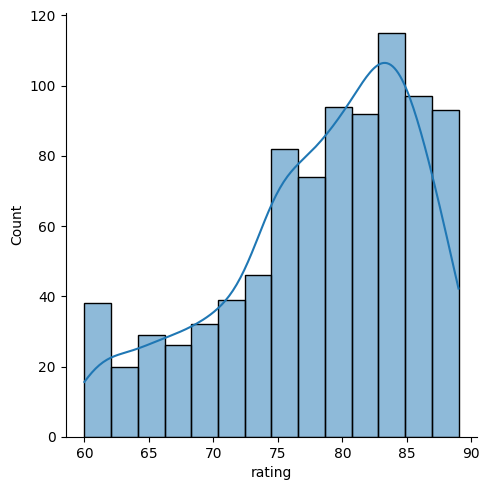

In [1580]:
# Distribution is near to normal
sns.displot(df,x = "rating",kind = "hist",kde = True)

In [1581]:
# No outliers
px.box(df,y = "rating")

In [1582]:
df["rating"].skew()

-0.6973291422750593

In [1583]:
# A lot of missing values
df["rating"].isnull().sum()

99

In [1584]:
# 5g,ncf,ir
px.pie(values = df["has_5g"].value_counts().values, names = df["has_5g"].value_counts().index)

In [1585]:
px.pie(values = df["has_nfc"].value_counts().values, names = df["has_nfc"].value_counts().index)

In [1586]:
px.pie(values = df["has_ir"].value_counts().values, names = df["has_ir"].value_counts().index)

In [1587]:
df[df["has_ir"] == True]["brand_name"].value_counts()

,count
brand_name,
Xiaomi,109
Poco,30
Iqoo,6
Vivo,4
Huawei,4
Redmi,2
Honor,1
Samsung,1


In [1588]:
# processor brand
df["processor_brand"].value_counts()

,count
processor_brand,
Qualcomm,414
MediaTek,385
Unisoc,59
Samsung,56
Apple,45
Google,9
Kirin,6
Tesla,1
Fusion,1


In [1589]:
px.pie(values = df["processor_brand"].value_counts().values, names = df["processor_brand"].value_counts().index)

In [1590]:
px.pie(values = df["processor_core"].value_counts().values, names = df["processor_core"].value_counts().index)

In [1591]:
px.pie(values = df["fast_charging"].value_counts().values, names = df["fast_charging"].value_counts().index)

In [1592]:
px.pie(values = df["fast_charging_available"].value_counts().values, names = df["fast_charging_available"].value_counts().index)

In [1593]:
px.pie(values = df["ram_capacity"].value_counts().values, names = df["ram_capacity"].value_counts().index)

In [1594]:
px.pie(values = df["storage"].value_counts().values, names = df["storage"].value_counts().index)

In [1595]:
px.pie(values = df["refreah_rate"].value_counts().values, names = df["refreah_rate"].value_counts().index)

In [1596]:
df[df["refreah_rate"] == 240]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir,processor_name,processor_brand,processor_core,processor_speed,ram_capacity,storage,battery(mah),fast_charging,fast_charging_available,screen_size,resolution,refreah_rate,num_rear_camera,num_front_camera,Primary_camera,Front_camera,extended_memory_available,extended_upto,os
784,Leitz,Leitz Phone 2,124990,89.0,True,True,False,Snapdragon 8 Gen1,Qualcomm,8,3.0,12,256,5000,NaN,1,6.6,1260 x 2730,240,2,1,47,12.0,1,1024.0,android


In [1597]:
# number of camera
d = (df['num_rear_camera'] + df['num_front_camera']).value_counts()
px.pie(d,names = d.index,values = d.values)

In [1598]:
# os
px.pie(values = df["os"].value_counts().values, names = df["os"].value_counts().index)

In [1599]:
# extended memory
px.pie(values = df["extended_memory_available"].value_counts().values, names = df["extended_memory_available"].value_counts().index)

In [1600]:
# extended memory
px.pie(values = df["extended_upto"].value_counts().values, names = df["extended_upto"].value_counts().index)

In [1601]:
def plot_graphs(column_name):
  sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df,x=column_name)

In [1602]:
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,7,9,13,14,16]].columns

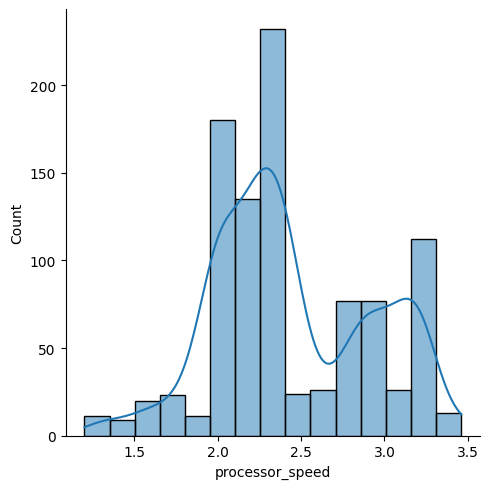

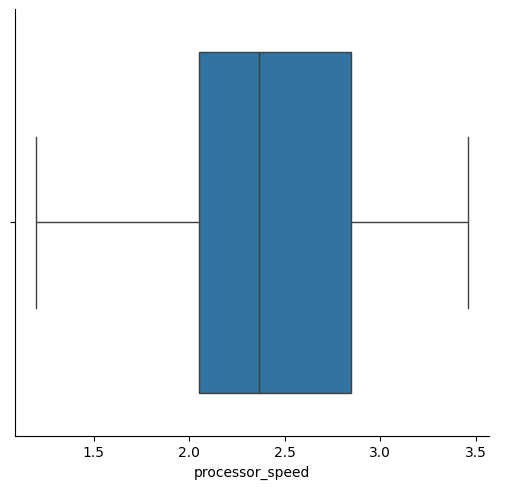

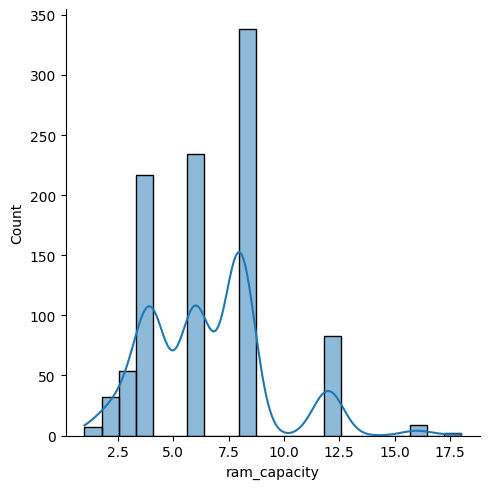

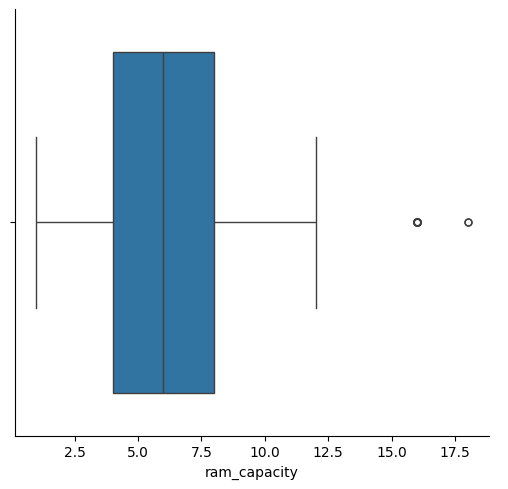

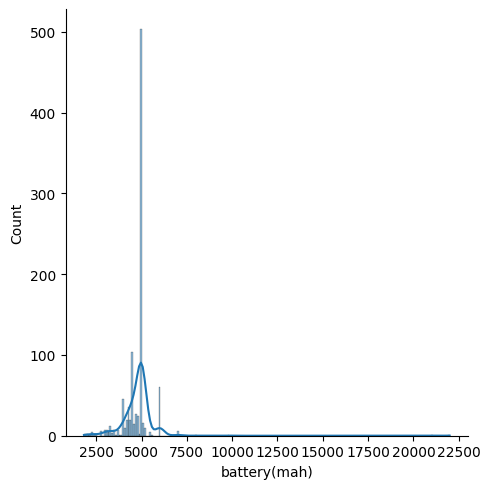

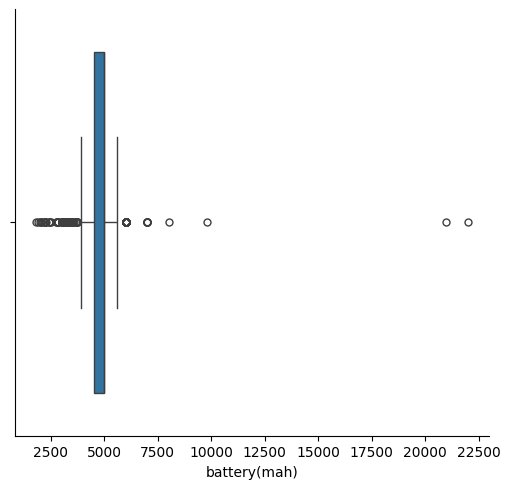

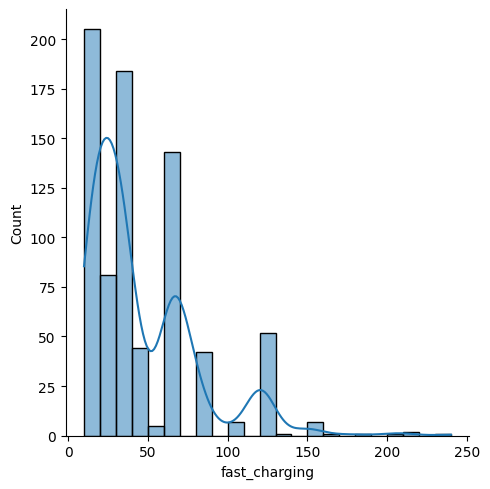

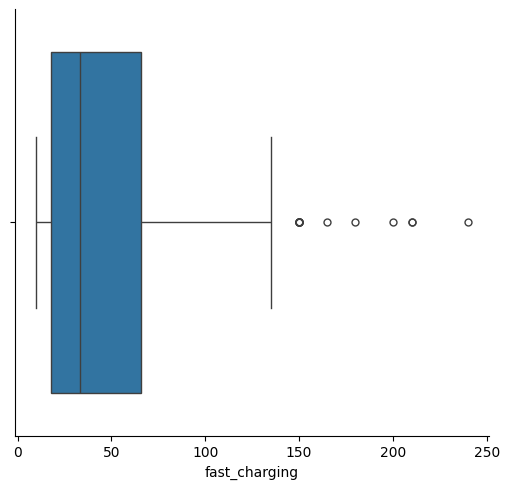

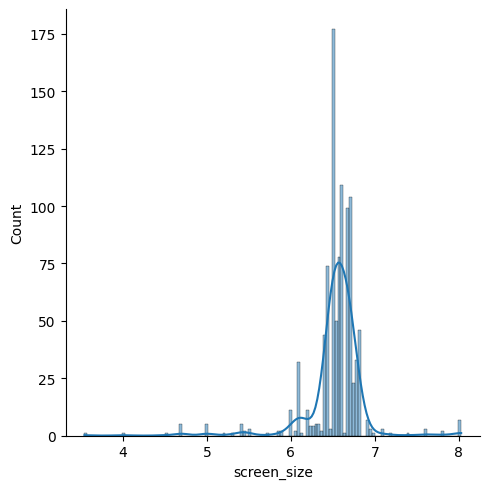

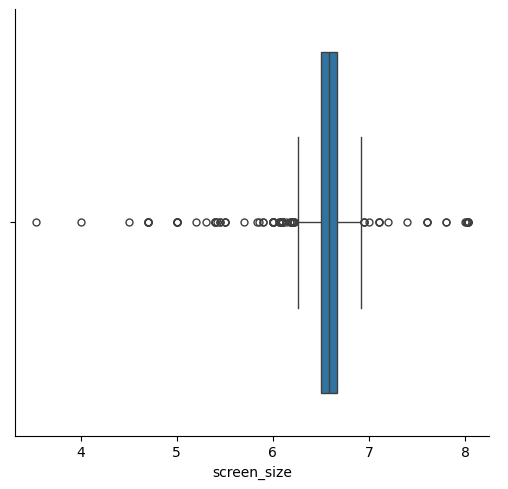

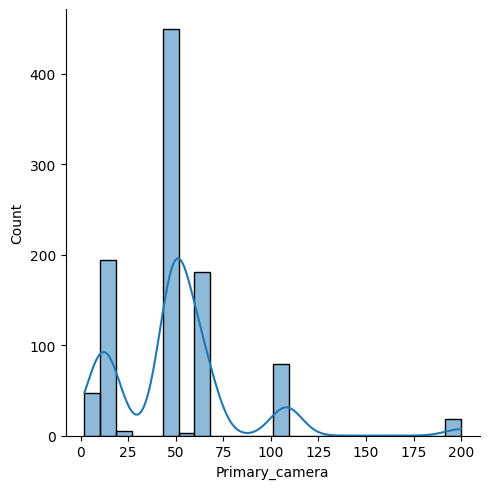

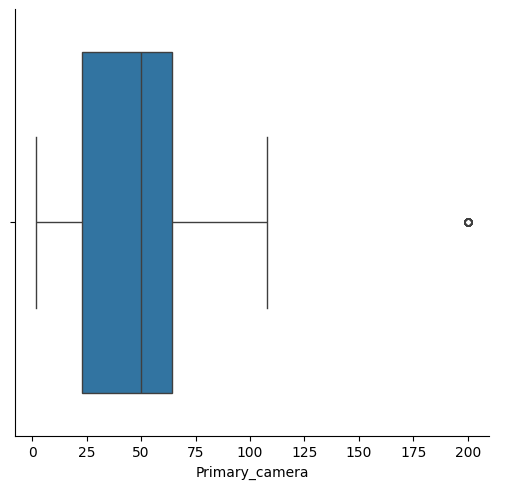

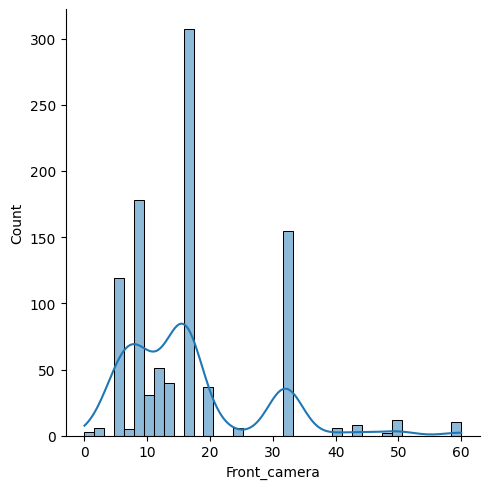

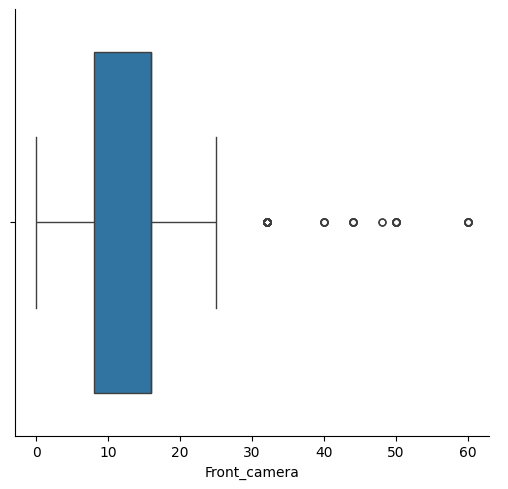

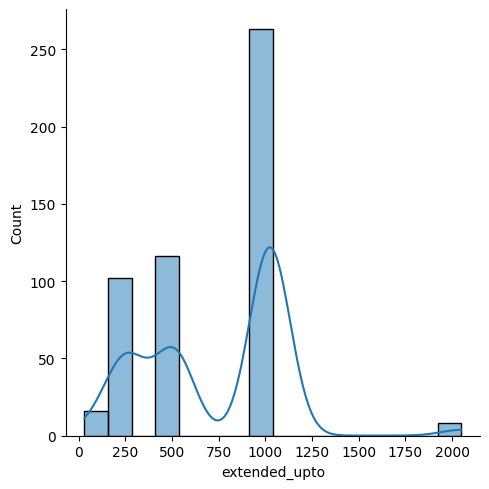

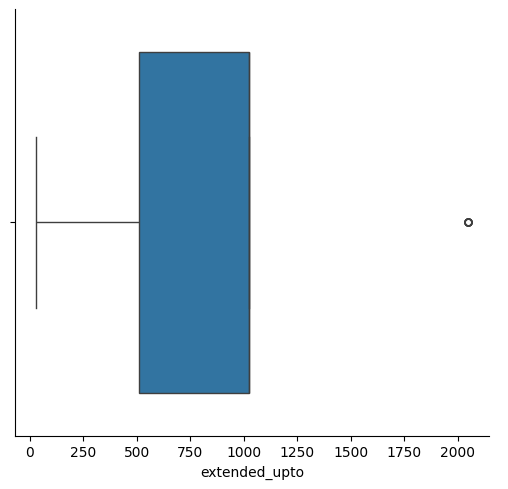

In [1603]:
for i in num_columns:
  plot_graphs(i)

# Bivariate

In [1604]:
# price and brand_name

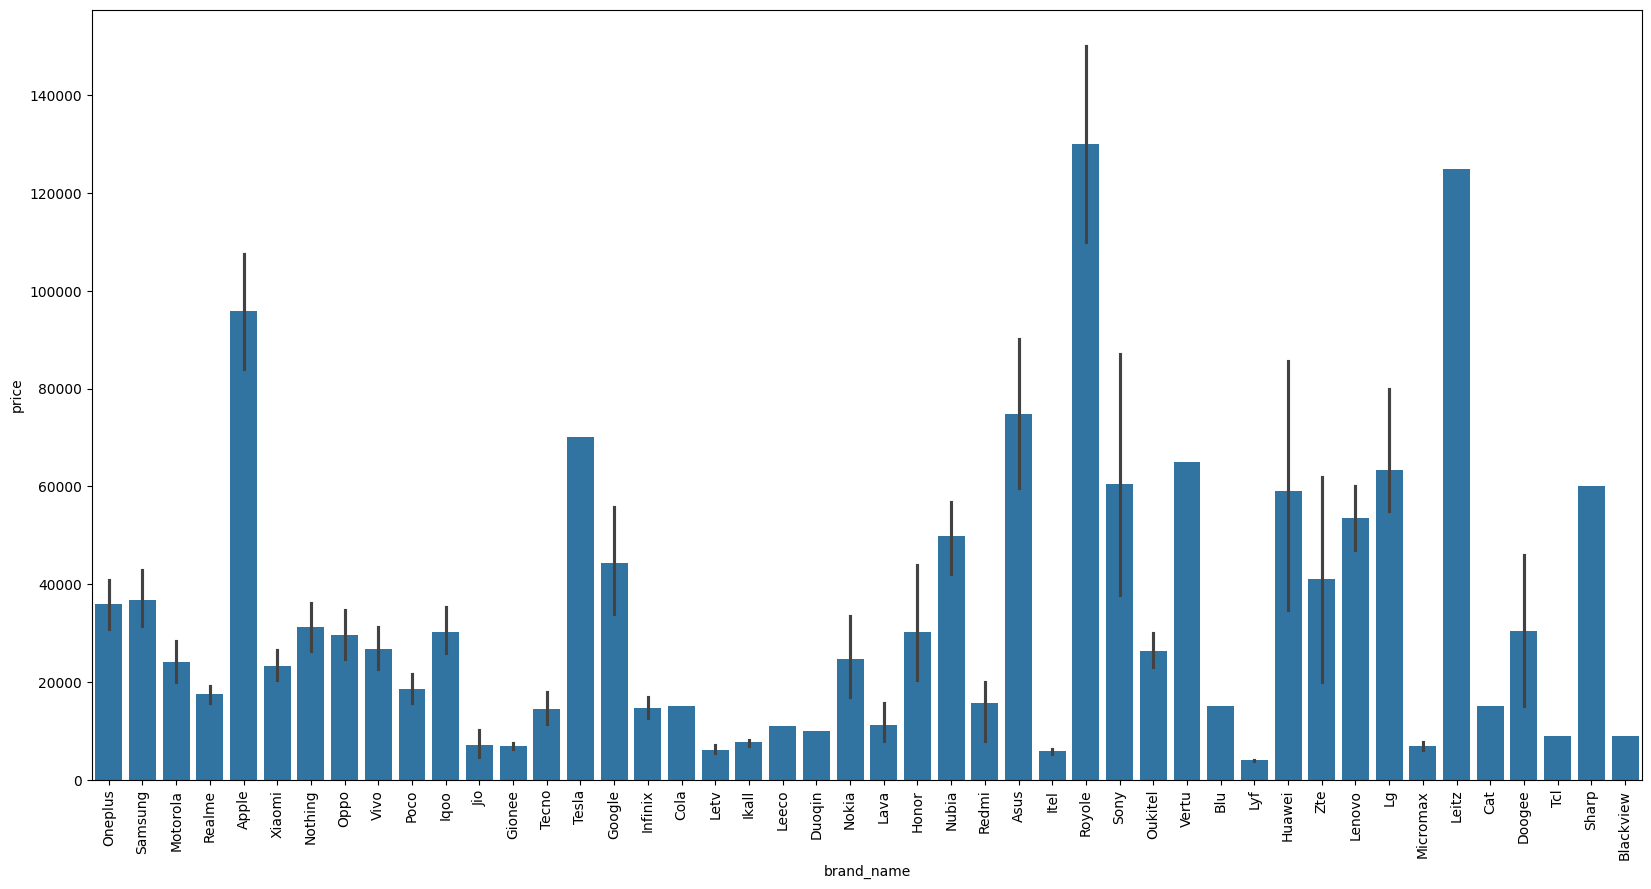

In [1605]:
plt.figure(figsize = (20,10))
sns.barplot(data = df,x ="brand_name",y = "price")
plt.xticks(rotation = "vertical")
plt.show()

In [1606]:
x = df.groupby("brand_name").count()["model"]

In [1607]:
temp_df = df[df["brand_name"].isin(x[x > 10].index)]

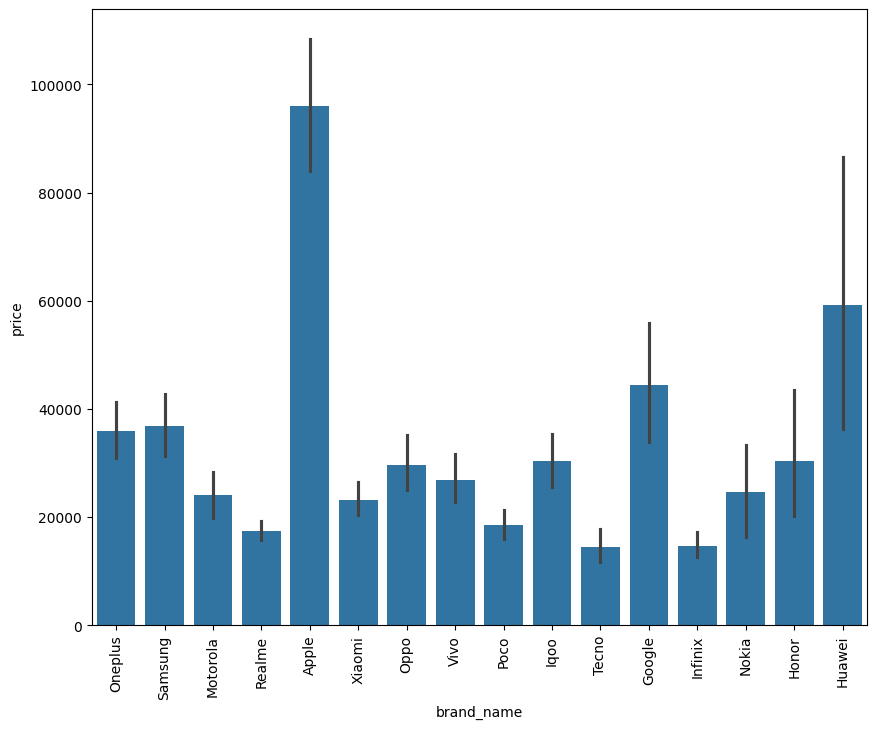

In [1608]:
plt.figure(figsize = (10,8))
sns.barplot(data = temp_df,x ="brand_name",y = "price")
plt.xticks(rotation = "vertical")
plt.show()

In [1609]:
# Battery(mah)
xx = df.groupby("brand_name").count()["battery(mah)"]
temp_df = df[df["brand_name"].isin(x[x > 10].index)]

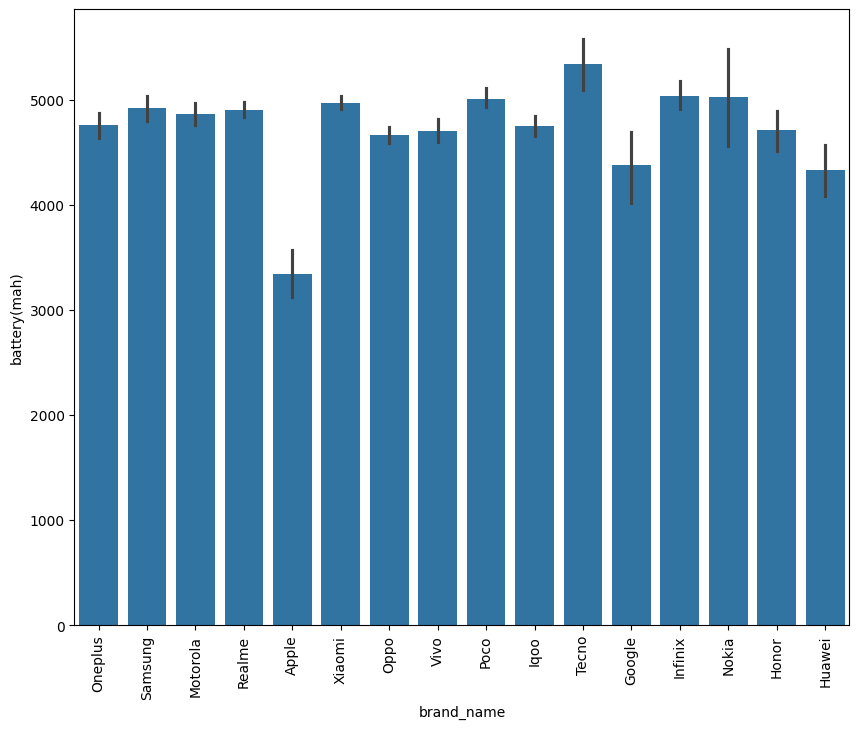

In [1610]:
plt.figure(figsize = (10,8))
sns.barplot(data = temp_df,x ="brand_name",y = "battery(mah)")
plt.xticks(rotation = "vertical")
plt.show()

In [1611]:
# rating
px.scatter(df, x = "rating", y = "price",color = "brand_name")

In [1612]:
# 5g
# sns.barplot(data = df, x = "has_5g",y = "price",estimator = np.median)
px.histogram(df,x = "has_5g",y = "price",histfunc='avg')

In [1613]:
# has nfc
px.histogram(df,x = "has_nfc",y = "price",histfunc='avg')

In [1614]:
# has ir
px.histogram(df,x = "has_ir",y = "price",histfunc='avg')

In [1615]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir,processor_name,processor_brand,processor_core,processor_speed,ram_capacity,storage,battery(mah),fast_charging,fast_charging_available,screen_size,resolution,refreah_rate,num_rear_camera,num_front_camera,Primary_camera,Front_camera,extended_memory_available,extended_upto,os
0,Oneplus,OnePlus 11 5G,54999,89.0,True,True,False,Snapdragon 8 Gen2,Qualcomm,8,3.2,12,256,5000,100.0,1,6.70,1440 x 3216,120,3,1,50,16.0,0,NaN,android
1,Oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,Snapdragon 695,Qualcomm,8,2.2,6,128,5000,33.0,1,6.59,1080 x 2412,120,3,1,64,16.0,1,1024.0,android
2,Samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,Exynos 1330,Samsung,8,2.4,4,64,5000,15.0,1,6.60,1080 x 2408,90,3,1,50,13.0,1,1024.0,android
3,Motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,Snapdragon 695,Qualcomm,8,2.2,6,128,5000,NaN,1,6.55,1080 x 2400,120,3,1,50,16.0,1,1024.0,android
4,Realme,Realme 10 Pro Plus,24999,82.0,True,False,False,Dimensity 1080,MediaTek,8,2.6,6,128,5000,67.0,1,6.70,1080 x 2412,120,3,1,108,16.0,0,NaN,android


In [1616]:
 # has proc brand
px.histogram(df,x = "processor_brand",y = "price",histfunc='avg')

<Axes: xlabel='processor_core', ylabel='price'>

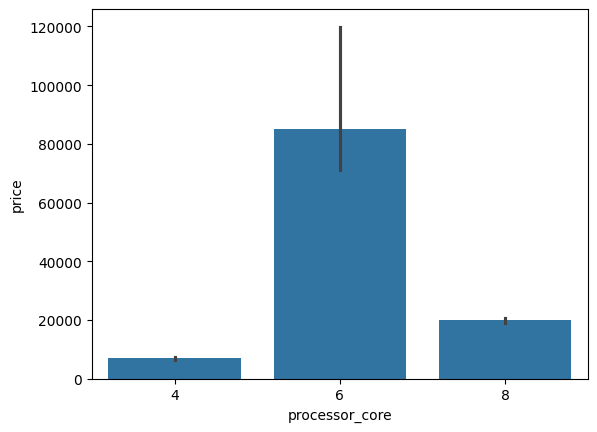

In [1617]:
# has nfc
sns.barplot(data = df,x = "processor_core",y = "price",estimator = "median")

In [1618]:
pd.crosstab(df["processor_core"],df["os"], normalize= "columns")*100

os,android,ios,other
processor_core,,,
4,3.707743,2.173913,7.692308
6,0.000000,95.652174,0.000000
8,96.292257,2.173913,92.307692


In [1619]:
# processor_speed
px.scatter(df,x = "processor_speed",y = "price",color="brand_name")

In [1620]:
# screen_size
px.scatter(df,x = "screen_size",y = "price",color="brand_name")

In [1621]:
df[df["price"]> 400000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir,processor_name,processor_brand,processor_core,processor_speed,ram_capacity,storage,battery(mah),fast_charging,fast_charging_available,screen_size,resolution,refreah_rate,num_rear_camera,num_front_camera,Primary_camera,Front_camera,extended_memory_available,extended_upto,os


In [1622]:
# price linearly dependent (on numerical data only)
px.imshow(df.corr(numeric_only = True),text_auto = True)

In [1623]:
df.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,99
has_5g,0
has_nfc,0
has_ir,0
processor_name,0
processor_brand,0
processor_core,0


In [1624]:
# rating mostly depends upon all other columns
df.corr(numeric_only = True)["rating"]

,rating
price,0.435055
rating,1.000000
has_5g,0.599747
has_nfc,0.473685
has_ir,0.156771
processor_core,0.209868
processor_speed,0.575977
ram_capacity,0.758877
storage,0.482762
battery(mah),0.000191


In [1625]:
# knn imputer (fill na values)
df.shape

(976, 26)

In [1626]:
x_df = df.select_dtypes(include = ["int64","float64"]).drop(columns = "price")

In [1627]:
x.shape

(46,)

In [1628]:
from sklearn.impute import KNNImputer

In [1629]:
imputer = KNNImputer(n_neighbors=5)

In [1630]:
x_df_values = imputer.fit_transform(x_df)

In [1631]:
x_df_values

array([[8.900e+01, 8.000e+00, 3.200e+00, ..., 1.600e+01, 0.000e+00,
        8.704e+02],
       [8.100e+01, 8.000e+00, 2.200e+00, ..., 1.600e+01, 1.000e+00,
        1.024e+03],
       [7.500e+01, 8.000e+00, 2.400e+00, ..., 1.300e+01, 1.000e+00,
        1.024e+03],
       ...,
       [8.500e+01, 8.000e+00, 2.850e+00, ..., 1.600e+01, 0.000e+00,
        8.704e+02],
       [8.000e+01, 8.000e+00, 2.200e+00, ..., 3.200e+01, 1.000e+00,
        1.024e+03],
       [7.400e+01, 8.000e+00, 2.900e+00, ..., 3.200e+01, 1.000e+00,
        1.024e+03]])

In [1632]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [1633]:
x_df['price'] = df['price']

In [1634]:
x_df.head()

,rating,processor_core,processor_speed,ram_capacity,storage,battery(mah),fast_charging,fast_charging_available,screen_size,refreah_rate,num_rear_camera,num_front_camera,Primary_camera,Front_camera,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,12.0,256.0,5000.0,100.0,1.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,870.4,54999.0
1,81.0,8.0,2.2,6.0,128.0,5000.0,33.0,1.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,19989.0
2,75.0,8.0,2.4,4.0,64.0,5000.0,15.0,1.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,16499.0
3,81.0,8.0,2.2,6.0,128.0,5000.0,29.2,1.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,14999.0
4,82.0,8.0,2.6,6.0,128.0,5000.0,67.0,1.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,24999.0


In [1635]:
a = x_df.corr(numeric_only = True)["price"].reset_index()
b = df.corr(numeric_only = True)["price"].reset_index()

In [1636]:
b.merge(a,on = "index")

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.435055,0.201036
2,processor_core,-0.104298,-0.039286
3,processor_speed,0.697093,0.326271
4,ram_capacity,0.510163,0.263342
5,storage,0.694233,0.239828
6,battery(mah),-0.162857,-0.093012
7,fast_charging,0.325543,0.152348
8,fast_charging_available,0.245926,0.100147
9,screen_size,0.240908,0.076924


In [1637]:
pd.set_option('display.max_rows',None)
pd.get_dummies(df,columns=["brand_name","processor_brand","os"],dtype = "int").corr(numeric_only = True)["price"]

,price
price,1.000000
rating,0.435055
has_5g,0.449984
has_nfc,0.580277
has_ir,-0.034157
processor_core,-0.104298
processor_speed,0.697093
ram_capacity,0.510163
storage,0.694233
battery(mah),-0.162857


# Feature Engineering

In [1638]:
df["resolution"].value_counts()

,count
resolution,
1080 x 2400,342
720 x 1600,149
1080 x 2408,65
1080 x 2412,58
1080 x 2340,42
1080 x 2460,39
1440 x 3200,31
720 x 1612,18
1170 x 2532,16


In [1639]:
df['resolution'] = df['resolution'].str.replace('\u2009', '', regex=False)  # Replace unicode space
df['resolution'] = df['resolution'].str.replace('\u00A0', '', regex=False)   # Replace non-breaking space

# Create a mapping dictionary
res = {
    '720x1280': 'HD',
    '720x1440': 'HD+',
    '720x1480': 'HD+',
    '720x1520': 'HD+',
    '720x1560': 'HD+',
    '720x1600': 'HD+',
    '720x1612': 'HD+',
    '720x1640': 'HD+',
    '720x1650': 'HD+',
    '720x1680': 'HD+',
    '1080x1920': 'Full HD',
    '1080x2160': 'Full HD+',
    '1080x2246': 'Full HD+',
    '1080x2280': 'Full HD+',
    '1080x2316': 'Full HD+',
    '1080x2340': 'Full HD+',
    '1080x2376': 'Full HD+',
    '1080x2388': 'Full HD+',
    '1080x2400': 'Full HD+',
    '1080x2404': 'Full HD+',
    '1080x2408': 'Full HD+',
    '1080x2412': 'Full HD+',
    '1080x2448': 'Full HD+',
    '1080x2460': 'Full HD+',
    '1080x2480': 'Full HD+',
    '1080x2520': 'Full HD+',
    '1080x2640': 'Full HD+',
    '1170x2532': 'Retina Display',
    '1179x2556': 'Retina Display',
    '1284x2778': 'Super Retina XDR',
    '1290x2796': 'Super Retina XDR',
    '1440x2560': 'Quad HD',
    '1440x2880': 'Quad HD+',
    '1440x2960': 'Quad HD+',
    '1440x3040': 'Quad HD+',
    '1440x3080': 'Quad HD+',
    '1440x3120': 'Quad HD+',
    '1440x3168': 'Quad HD+',
    '1440x3200': 'Quad HD+',
    '1440x3214': 'Quad HD+',
    '1440x3216': 'Quad HD+',
    '1440x3412': 'Quad HD+',
    '1644x3840': '4K UHD',
    '1914x2160': 'WUXGA',
    '1920x1080': 'Full HD',
    '2088x2250': 'Custom Resolution',
    '2220x1080': 'Full HD+',
    '1600x720': 'HD',
    '2400x1080': 'Full HD',
    '720x1544': 'HD',
    '1916x2160': 'WUXGA',
    '1520x720': 'HD',
    '750x1334': 'HD',
    '854x480': 'HD',
    '1612x720': 'HD',
    '1116x2480': 'HD',
    '1220x2712': 'HD',
    '828x1792': 'HD',
    '2460x1080': 'Full HD',
    '1792x1920': 'HD',
    '2408x1080': 'Full HD',
    '2200x2480': 'HD',
    '1344x2772': 'HD',
    '1260x2800': 'HD',
    '1440x1920': 'Quad HD',
    '1812x2176': 'HD',
    '480x640': 'HD',
    '1242x2688': 'HD',
    '1176x2400': 'HD',
    '1200x2640': 'HD',
    '1860x2480': 'HD',
    '750x1580': 'HD',
    '1200x2652': 'HD',
    '1288x2700': 'HD',
    '1260x2730': 'HD',
    '1768x2208': 'HD',
    '1440x3088': 'HD',
    '1212x2616': 'HD',
    '1400x3200': 'HD',
    '480x854': 'HD',
    '1640x720': 'HD',
    '1200x2400': 'HD',
    '1200x2860': 'HD',
    '640x960': 'HD',
    '1560x720': 'HD',
}


# Replace resolutions with their corresponding labels
r = df['resolution'].replace(res)
df.insert(18,"resolution_n",r)

In [1640]:
res = [
    "Quad HD+",  # Samsung Galaxy S23 Ultra 5G
    "HD",        # Apple iPhone 11
    "Quad HD+",  # Oppo Find N Fold
    "HD",        # Apple iPhone 11 (128GB)
    "HD+",       # Jio Phone 3
    "Quad HD+",  # Oppo Find N2 5G
    "Full HD+",  # Vivo X90 5G
    "HD",        # Apple iPhone 9
    "QVGA",      # Duoqin F22 Pro
    "Quad HD+",  # Nokia N73 5G
    "HD+",       # Lava Blaze 5G
    "Full HD+",  # Nubia Red Magic 8 Pro 5G
    "HD",        # Apple iPhone XR2
    "HD+",       # itel S16 Pro
    "QXGA",      # Samsung Galaxy Z Fold 4
    "Full HD+",  # Vivo X90 Pro 5G
    "HD+",       # Vivo Y93
    "HD+",       # Vivo Y22s
    "Full HD+",  # Xiaomi 12T Pro 5G
    "Quad HD+",  # Samsung Galaxy S24 Ultra
    "Quad HD+",  # OPPO Find N Flip
    "HD+",       # itel P36
    "HD",        # Apple iPhone SE 3 2022
    "HD+",       # Infinix Hot 12 Play
    "HD+",       # Vivo Y25
    "QVGA",      # Itel A24 Pro
    "HD+",       # Vivo Y3 (4GB RAM + 128GB)
    "Full HD+",  # ZTE Axon 40 Ultra 5G
    "Full HD+",  # Nubia Red Magic 8 Pro Plus
    "QXGA",      # Samsung Galaxy Z Fold 3
    "HD",        # Apple iPhone 11 Pro Max
    "HD",        # Apple iPhone 7s
    "Full HD+",  # Huawei Mate 40 Pro 4G
    "HD",        # Apple iPhone SE 2020
    "HD+",       # itel Vision 3
    "Full HD+",  # Honor Magic 4 Pro Plus 5G
    "HD+",       # Realme C25Y (4GB RAM + 64GB)
    "HD+",       # itel Vision 3 (2GB RAM + 32GB)
    "Quad HD+",  # Oppo Find N 5G
    "HD+",       # Vivo Y15
    "Full HD+",  # Xiaomi 12T
    "Full HD+",  # Huawei Mate Xs 2
    "Full HD+",  # Huawei P50 Pro 4G
    "HD+",       # itel S16
    "HD+",       # Vivo Y12 (3GB RAM + 64GB)
    "Full HD+",  # Honor 80 Pro Plus
    "HD",        # Apple iPhone SE 4
    "HD+",       # OPPO A54 (4GB RAM + 128GB)
    "Quad HD+",  # Xiaomi Mi Mix Fold
    "HD+",       # OPPO A54
    "Full HD+",  # Huawei P40 Pro
    "HD+",       # Vivo Y11 (2019)
    "HD+",       # Vivo Y95
    "Full HD+",  # Leitz Phone 2
    "Full HD+",  # Xiaomi Redmi K50 Ultra 5G
    "HD+",       # Vivo Y21T
    "WVGA",      # CAT S22 Flip
    "QVGA",      # Itel A23 Pro
    "HD+",       # Oppo A12
    "QXGA",      # Samsung Galaxy Z Fold 4 (12GB RAM + 1TB)
    "HD+",       # OPPO A54 (6GB RAM + 128GB)
    "HD+",       # OPPO A53 2020 (6GB RAM + 128GB)
    "HD+",       # itel Vision 1 (3GB RAM + 32GB)
    "HD+",       # Vivo Y21 (2020)
    "HD+",       # Realme C2
    "QXGA",      # Huawei Mate X
    "HD+",       # Vivo Y55S
    "HD+",       # Lava X3
    "QVGA"       # itel A23s
]


In [1641]:
i = df[df["resolution_n"] == "HD"].index
df.loc[i,"resolution_n"] = res

In [1642]:
df[df["resolution_n"] == "HD"]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir,processor_name,processor_brand,processor_core,processor_speed,ram_capacity,storage,battery(mah),fast_charging,fast_charging_available,screen_size,resolution,resolution_n,refreah_rate,num_rear_camera,num_front_camera,Primary_camera,Front_camera,extended_memory_available,extended_upto,os
33,Apple,Apple iPhone 11,38999,73.0,False,True,False,A13 Bionic,Apple,6,2.65,4,64,3110,NaN,0,6.1,828x1792,HD,60,2,1,12,12.0,0,NaN,ios
136,Apple,Apple iPhone 11 (128GB),46999,75.0,False,True,False,A13 Bionic,Apple,6,2.65,4,128,3110,NaN,0,6.1,828x1792,HD,60,2,1,12,12.0,0,NaN,ios
173,Apple,Apple iPhone 9,29990,61.0,False,True,False,A13 Bionic,Apple,6,2.65,3,64,2050,NaN,1,4.7,750x1334,HD,60,1,1,12,7.0,0,NaN,ios
262,Apple,Apple iPhone XR2,71999,60.0,False,True,False,Apple A13,Apple,6,2.49,4,64,3060,NaN,1,6.1,828x1792,HD,60,2,1,12,7.0,0,NaN,ios
435,Apple,Apple iPhone SE 3 2022,43900,NaN,True,True,False,Bionic A15,Apple,6,3.22,4,64,2018,20.0,1,4.7,750x1334,HD,60,1,1,12,7.0,0,NaN,ios
594,Apple,Apple iPhone 11 Pro Max,109900,77.0,False,True,False,A13 Bionic,Apple,6,2.65,4,64,3500,18.0,1,6.5,1242x2688,HD,60,3,1,12,12.0,0,NaN,ios
595,Apple,Apple iPhone 7s,52990,NaN,False,False,False,Fusion APL1024,Fusion,4,2.37,3,32,2230,NaN,0,4.7,750x1334,HD,60,1,1,13,7.0,0,NaN,ios
638,Apple,Apple iPhone SE 2020,39900,63.0,False,True,False,A13 Bionic,Apple,6,2.65,3,64,1821,18.0,1,4.7,750x1334,HD,60,1,1,12,7.0,0,NaN,ios
737,Apple,Apple iPhone SE 4,49990,60.0,True,True,False,Bionic A15,Apple,6,3.22,4,64,2400,20.0,1,6.1,750x1580,HD,60,1,1,12,10.0,0,NaN,ios


<Axes: xlabel='resolution_n'>

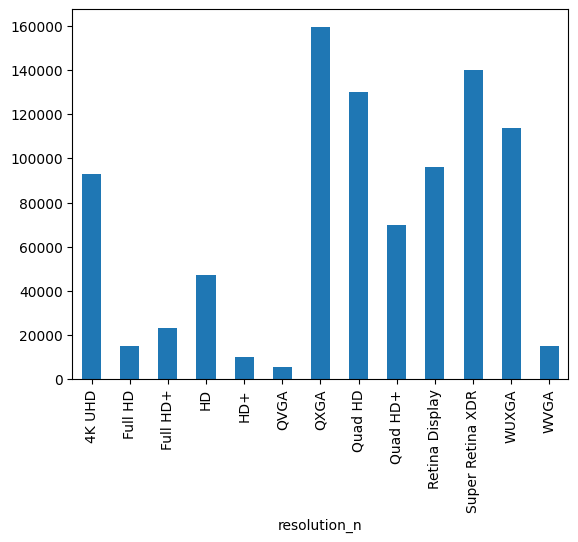

In [1643]:
df.groupby("resolution_n")["price"].median().plot(kind = "bar")

[]

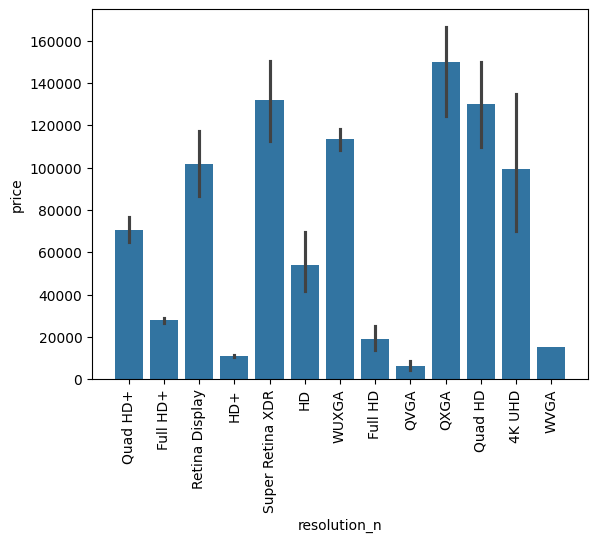

In [1644]:
# plt.figure(figsize = (10,8))
sns.barplot(data = df,x = "resolution_n",y = "price")
plt.xticks(rotation = "vertical")
plt.plot()

<Axes: xlabel='resolution_n', ylabel='brand_name'>

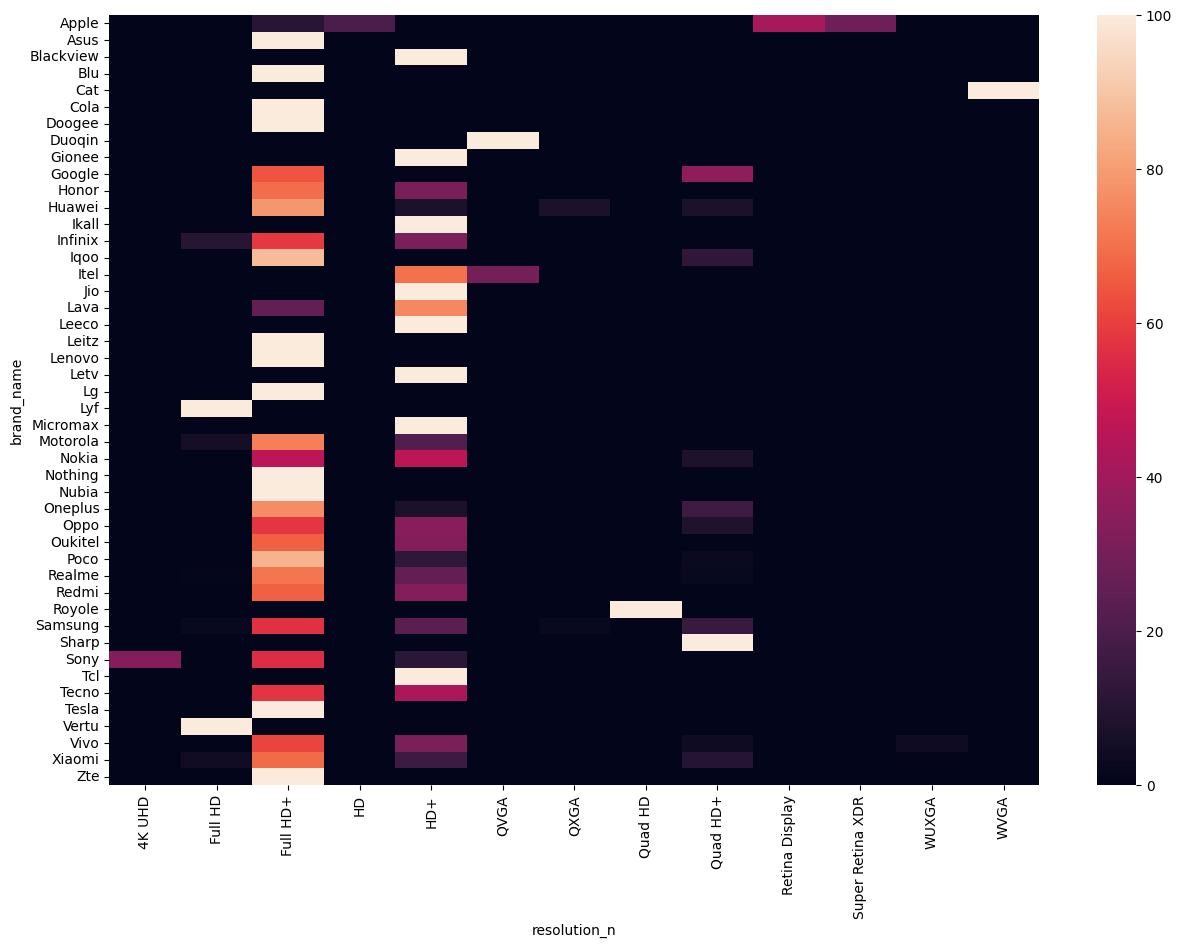

In [1645]:
plt.figure(figsize = (15,10))
sns.heatmap(pd.crosstab(df["brand_name"],df["resolution_n"],normalize = "index")*100)

In [1647]:
df.to_csv("mobile_data.csv",index = False)